In [1]:
%autosave 30

Unrecognized magic `%autosave`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


## Libaries

In [2]:
using DifferentialEquations
using Plots

## Functions

In [3]:
#=
     Croft (1)
ne = Electron density
nm = Max electron density
r  = Radial distance from earth center (height + earth radius)
rm = Value of r at max electron density
rb = Value of r at the layer base
ym = Layer of semithickness
dne_dr = change in electron density with respect to radius
=#

function qpne(r, nm, hm, ym)
    hm_meters = hm * 10^3
    ym_meters = ym * 10^3
    r_earth = 6371 * 10^3
    r_max = hm_meters + r_earth
    r_base = r_max - ym_meters
    r_top = r_max + ym_meters
    
    if (r > r_base && r < r_top)
        a = (r - r_max) / ym_meters
        ne = nm * (1 - a^2)
        dne_dr = -2 * nm * a / ym_meters
    else
        ne = 1 * 10^-31
        dne_dr = ne
    end
    return ne, dne_dr
end

qpne (generic function with 1 method)

In [4]:
#=
     Croft (3)
mu2 = refractive index
=#

function index_refraction_no_b(r, freq, iono_params)
    nm = iono_params[2]
    hm = iono_params[3]
    ym = iono_params[4]
    ne, dne_dr = qpne(r, nm, hm, ym)

    fe_plasma = 8.98e3 * sqrt(ne / 1.e6)
    x = fe_plasma / freq
    mu2 = 1. - x * x
    dx_dr = x * dne_dr / (2. * ne)
    dmu2_dr = -2. * x * dx_dr
    return mu2, dmu2_dr
end

index_refraction_no_b (generic function with 1 method)

## Main

In [5]:
Nm = 5e11
Ym = 50
Hm = 300
Freq = 5e6

rTest = collect(6371:1:6700)*1000
for i in rTest
    Ne, dNedr = qpne(i, Nm, Hm, Ym)
    println(i," ", Ne, " ", dNedr)
end

6371000 1.0000000000000034e-31 1.0000000000000034e-31
6372000 1.0000000000000034e-31 1.0000000000000034e-31
6373000 1.0000000000000034e-31 1.0000000000000034e-31
6374000 1.0000000000000034e-31 1.0000000000000034e-31
6375000 1.0000000000000034e-31 1.0000000000000034e-31
6376000 1.0000000000000034e-31 1.0000000000000034e-31
6377000 1.0000000000000034e-31 1.0000000000000034e-31
6378000 1.0000000000000034e-31 1.0000000000000034e-31
6379000 1.0000000000000034e-31 1.0000000000000034e-31
6380000 1.0000000000000034e-31 1.0000000000000034e-31
6381000 1.0000000000000034e-31 1.0000000000000034e-31
6382000 1.0000000000000034e-31 1.0000000000000034e-31
6383000 1.0000000000000034e-31 1.0000000000000034e-31
6384000 1.0000000000000034e-31 1.0000000000000034e-31
6385000 1.0000000000000034e-31 1.0000000000000034e-31
6386000 1.0000000000000034e-31 1.0000000000000034e-31
6387000 1.0000000000000034e-31 1.0000000000000034e-31
6388000 1.0000000000000034e-31 1.0000000000000034e-31
6389000 1.0000000000000034e-

6579000 1.0000000000000034e-31 1.0000000000000034e-31
6580000 1.0000000000000034e-31 1.0000000000000034e-31
6581000 1.0000000000000034e-31 1.0000000000000034e-31
6582000 1.0000000000000034e-31 1.0000000000000034e-31
6583000 1.0000000000000034e-31 1.0000000000000034e-31
6584000 1.0000000000000034e-31 1.0000000000000034e-31
6585000 1.0000000000000034e-31 1.0000000000000034e-31
6586000 1.0000000000000034e-31 1.0000000000000034e-31
6587000 1.0000000000000034e-31 1.0000000000000034e-31
6588000 1.0000000000000034e-31 1.0000000000000034e-31
6589000 1.0000000000000034e-31 1.0000000000000034e-31
6590000 1.0000000000000034e-31 1.0000000000000034e-31
6591000 1.0000000000000034e-31 1.0000000000000034e-31
6592000 1.0000000000000034e-31 1.0000000000000034e-31
6593000 1.0000000000000034e-31 1.0000000000000034e-31
6594000 1.0000000000000034e-31 1.0000000000000034e-31
6595000 1.0000000000000034e-31 1.0000000000000034e-31
6596000 1.0000000000000034e-31 1.0000000000000034e-31
6597000 1.0000000000000034e-

In [6]:
IonoParams = ["QP", Nm, Hm, Ym]
for k in rTest
    mu2, dmu2dr = index_refraction_no_b(k, Freq, IonoParams)
    println(k, " ", mu2, " ", dmu2dr)
end

6371000 1.0 -3.2256160000000114e-43
6372000 1.0 -3.2256160000000114e-43
6373000 1.0 -3.2256160000000114e-43
6374000 1.0 -3.2256160000000114e-43
6375000 1.0 -3.2256160000000114e-43
6376000 1.0 -3.2256160000000114e-43
6377000 1.0 -3.2256160000000114e-43
6378000 1.0 -3.2256160000000114e-43
6379000 1.0 -3.2256160000000114e-43
6380000 1.0 -3.2256160000000114e-43
6381000 1.0 -3.2256160000000114e-43
6382000 1.0 -3.2256160000000114e-43
6383000 1.0 -3.2256160000000114e-43
6384000 1.0 -3.2256160000000114e-43
6385000 1.0 -3.2256160000000114e-43
6386000 1.0 -3.2256160000000114e-43
6387000 1.0 -3.2256160000000114e-43
6388000 1.0 -3.2256160000000114e-43
6389000 1.0 -3.2256160000000114e-43
6390000 1.0 -3.2256160000000114e-43
6391000 1.0 -3.2256160000000114e-43
6392000 1.0 -3.2256160000000114e-43
6393000 1.0 -3.2256160000000114e-43
6394000 1.0 -3.2256160000000114e-43
6395000 1.0 -3.2256160000000114e-43
6396000 1.0 -3.2256160000000114e-43
6397000 1.0 -3.2256160000000114e-43
6398000 1.0 -3.2256160000000

6623000 0.8735558527999999 -6.19318272e-5
6624000 0.8122691487999999 -6.0641580800000004e-5
6625000 0.7522726912000001 -5.93513344e-5
6626000 0.6935664800000001 -5.8061088000000006e-5
6627000 0.6361505152 -5.6770841600000004e-5
6628000 0.5800247967999999 -5.54805952e-5
6629000 0.5251893247999998 -5.41903488e-5
6630000 0.47164409919999994 -5.2900102399999984e-5
6631000 0.41938912000000006 -5.1609856000000015e-5
6632000 0.36842438720000026 -5.031960959999999e-5
6633000 0.3187499008 -4.9029363200000004e-5
6634000 0.2703656608 -4.77391168e-5
6635000 0.2232716671999999 -4.64488704e-5
6636000 0.1774679200000001 -4.515862399999999e-5
6637000 0.13295441920000017 -4.38683776e-5
6638000 0.08973116479999987 -4.2578131200000006e-5
6639000 0.047798156800000324 -4.128788479999999e-5
6640000 0.007155395200000636 -3.999763839999999e-5
6641000 -0.03219711999999997 -3.8707392e-5
6642000 -0.07025938880000027 -3.741714560000001e-5
6643000 -0.10703141119999993 -3.612689920000001e-5
6644000 -0.1425131872000

In [7]:
#Initial Conditions
r_init = 6371e3
θ_init = 0
Q_init = sin(45)
x0 = [r_init, Q_init, θ_init];

In [8]:
#Parameters
freq = 8e6
Nm = 5e11
Ym = 50
Hm = 300
IonoParams = ["QP", Nm, Hm, Ym]

4-element Array{Any,1}:
    "QP"
   5.0e11
 300
  50

In [9]:
function raytrace!(du, u, p, t)
    du[1] = -1.26e-43/2 + (1-u[1]^2)/u[2]
    du[2] = u[1]
    du[3] = sqrt(1-u[1]^2)/u[2]
end

u0 = [sin(π/4); 6371e3; 0.0]
tspan = (0.0,1000000.0)
prob = ODEProblem(raytrace!, u0, tspan)
sol = solve(prob, dt = .01)

retcode: Success
Interpolation: automatic order switching interpolation
t: 11-element Array{Float64,1}:
      0.0
      0.01
      0.10999999999999999
      1.1099999999999999
     11.109999999999998
    111.10999999999997
   1111.1099999999997
  11111.109999999997
 111111.10999999996
 515662.63856272947
      1.0e6
u: 11-element Array{Array{Float64,1},1}:
 [0.7071067811865475, 6.371e6, 0.0]
 [0.7071067819713536, 6.371000007071068e6, 1.109883504005245e-9]
 [0.707106789819415, 6.371000077781746e6, 1.2208718408555139e-8]
 [0.7071068683000143, 6.371000784888575e6, 1.2319705390379993e-7]
 [0.7071076531045706, 6.371007855961182e6, 1.2330790538319492e-6]
 [0.707115501006413, 6.37107856711889e6, 1.2331763551796488e-5]
 [0.707193965654588, 6.371785721854397e6, 0.00012330505951264827]
 [0.7079771768810488, 6.378861579740256e6, 0.0012316842301406848]
 [0.7156675239044828, 6.450045948369214e6, 0.012181209716264992]
 [0.7442957232401824, 6.745490784335013e6, 0.05408151405610947]
 [0.77389494493666

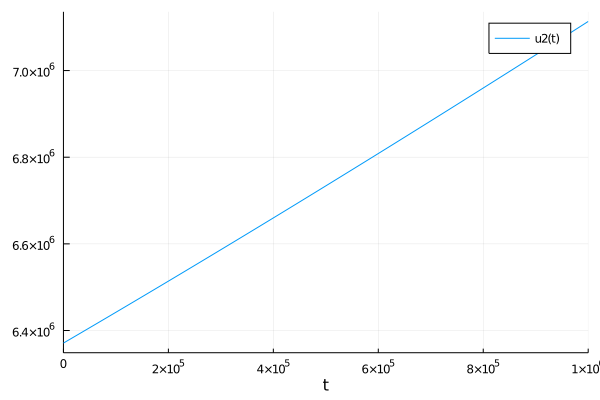

In [10]:
plot(sol, vars=(0,2))